# Alura Course - Seaborn for data visualization

## Downloading data

In [1]:
from helper import data_acquisition

In [2]:
data_acquisition.from_url('https://s3.amazonaws.com/caelum-online-public/1039-seaborn/material/tips.csv')

## Importing libs

In [3]:
import pandas as pd

In [6]:
import seaborn as sns

In [26]:
from scipy.stats import ranksums

## Importing data

In [4]:
dataframe = pd.read_csv('./data/tips.csv')

In [5]:
dataframe.sample(5)

,total_bill,tip,dessert,day,time,size
12,15.42,1.57,No,Sun,Dinner,2
243,18.78,3.00,No,Thur,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2
119,24.08,2.92,No,Thur,Lunch,4
217,11.59,1.50,Yes,Sat,Dinner,2


## First analysis - Total Bill vs Tip

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

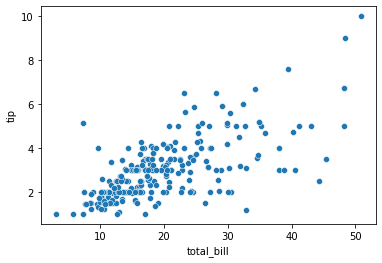

In [7]:
sns.scatterplot(x='total_bill', y='tip', data=dataframe)

### Adding a columns for tip %

In [8]:
dataframe['percent'] = dataframe['tip'] / dataframe['total_bill']

In [9]:
dataframe.percent = dataframe.percent.round(2)

In [10]:
dataframe.sample(5)

,total_bill,tip,dessert,day,time,size,percent
69,15.01,2.09,Yes,Sat,Dinner,2,0.14
1,10.34,1.66,No,Sun,Dinner,3,0.16
52,34.81,5.20,No,Sun,Dinner,4,0.15
176,17.89,2.00,Yes,Sun,Dinner,2,0.11
150,14.07,2.50,No,Sun,Dinner,2,0.18


<AxesSubplot:xlabel='total_bill', ylabel='percent'>

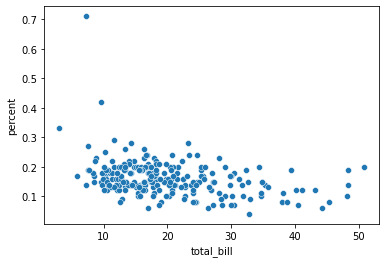

In [11]:
sns.scatterplot(x='total_bill', y ='percent', data=dataframe)

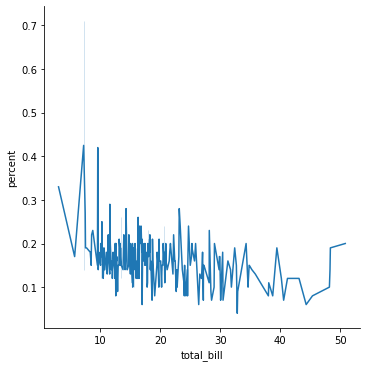

In [12]:
sns.relplot(x='total_bill', y ='percent', data=dataframe, kind='line')

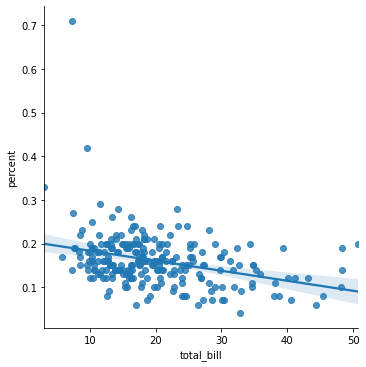

In [13]:
sns.lmplot(x='total_bill', y ='percent', data=dataframe)

## Second analysis - Dessert

In [16]:
by_dessert = dataframe.groupby('dessert')

In [19]:
by_dessert.get_group('Yes').describe()

,total_bill,tip,size,percent
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [20]:
by_dessert.get_group('No').describe()

,total_bill,tip,size,percent
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


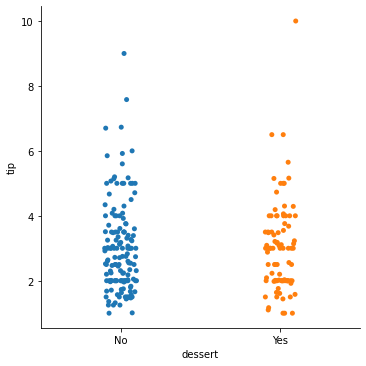

In [21]:
sns.catplot(x='dessert', y='tip', data=dataframe)

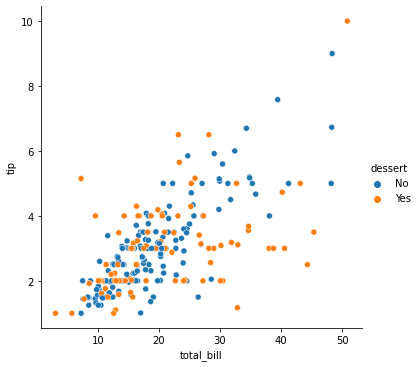

In [22]:
sns.relplot(x='total_bill', y='tip', hue='dessert', data=dataframe)

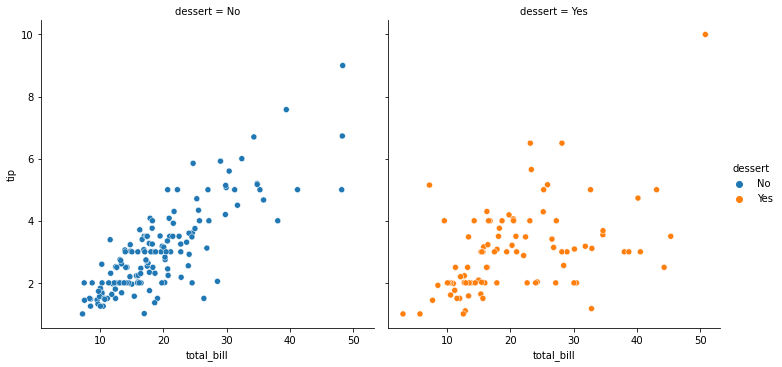

In [23]:
sns.relplot(x='total_bill', y='tip', hue='dessert', data=dataframe, col='dessert')

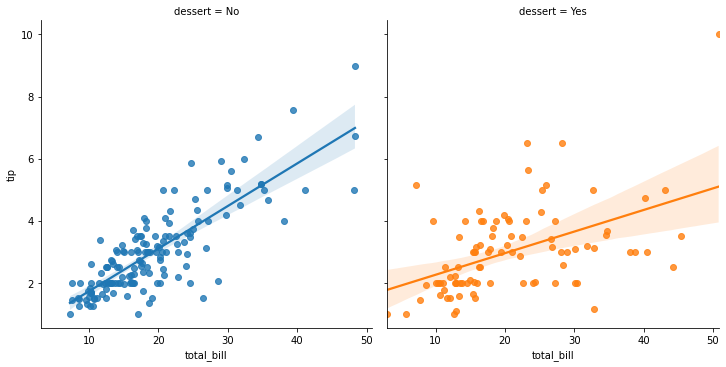

In [24]:
sns.lmplot(x='total_bill', y='tip', hue='dessert', col='dessert', data=dataframe)

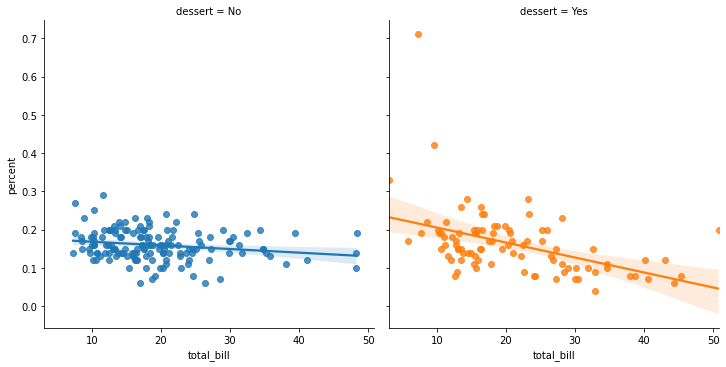

In [25]:
sns.lmplot(x='total_bill', y='percent', hue='dessert', col='dessert', data=dataframe)

### Hypothesis test

**H<sup>null</sup>** 
> the tip distribution is proportional for both the groups, people who ordered dessert and people who don't ordered dessert

**H<sup>alt</sup>**
> the tip distribution is not proportional for both the groups, people who ordered dessert and people who don't ordered dessert

In [29]:
dessert_yes = dataframe.query("dessert == 'Yes'").percent

In [30]:
dessert_no = dataframe.query("dessert == 'No'").percent

In [31]:
ranksums(dessert_yes, dessert_no)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

The P-value is 0.5266635660124415

**H<sup>null</sup>** 
> the tip distribution is proportional for both the groups, people who ordered dessert and people who don't ordered dessert

## Third analysis - Weekday

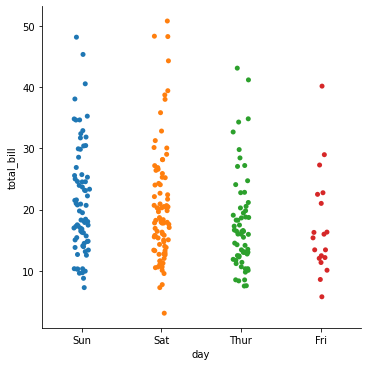

In [32]:
sns.catplot(x='day', y='total_bill', data=dataframe)

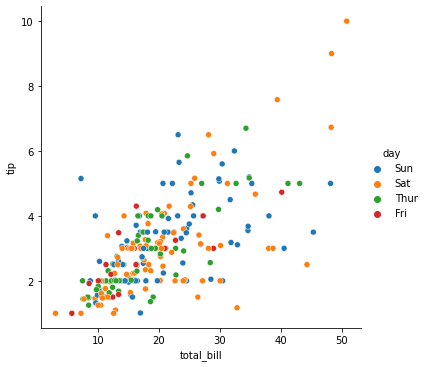

In [34]:
sns.relplot(x='total_bill', y='tip', hue='day', data=dataframe)

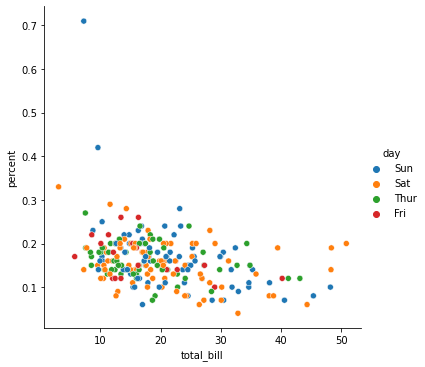

In [35]:
sns.relplot(x='total_bill', y='percent', hue='day', data=dataframe)

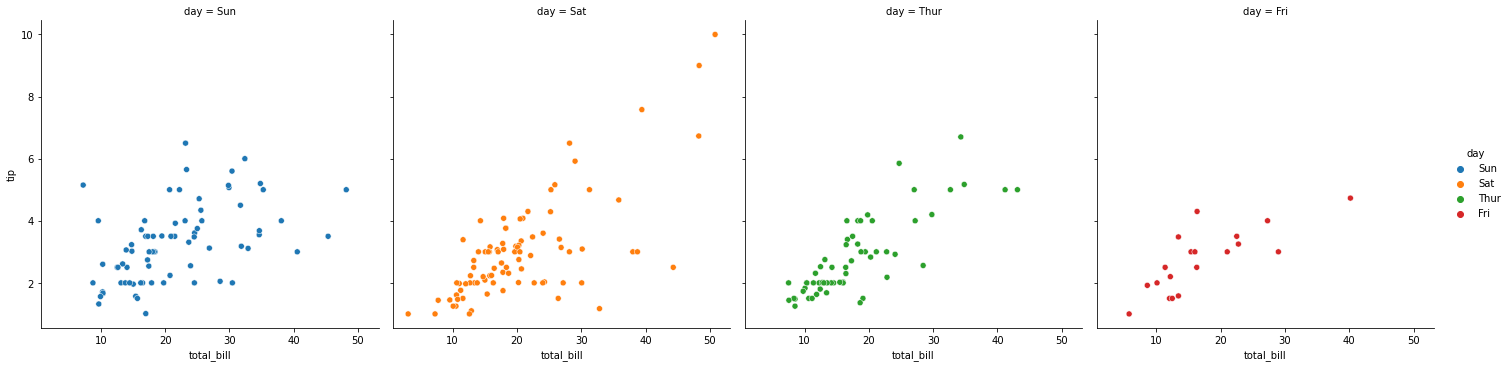

In [36]:
sns.relplot(x='total_bill', y='tip', hue='day', col='day', data=dataframe)

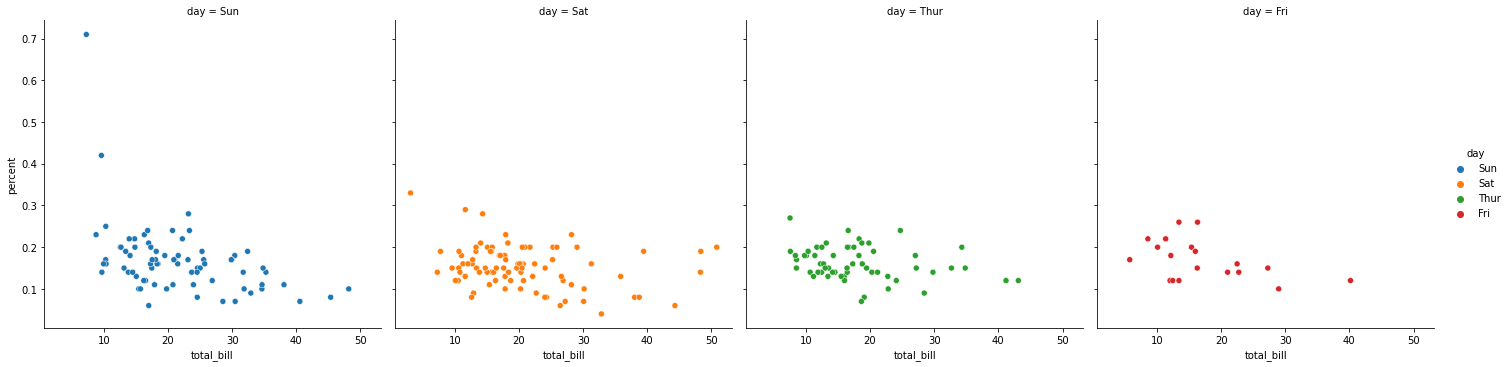

In [37]:
sns.relplot(x='total_bill', y='percent', hue='day', col='day', data=dataframe)

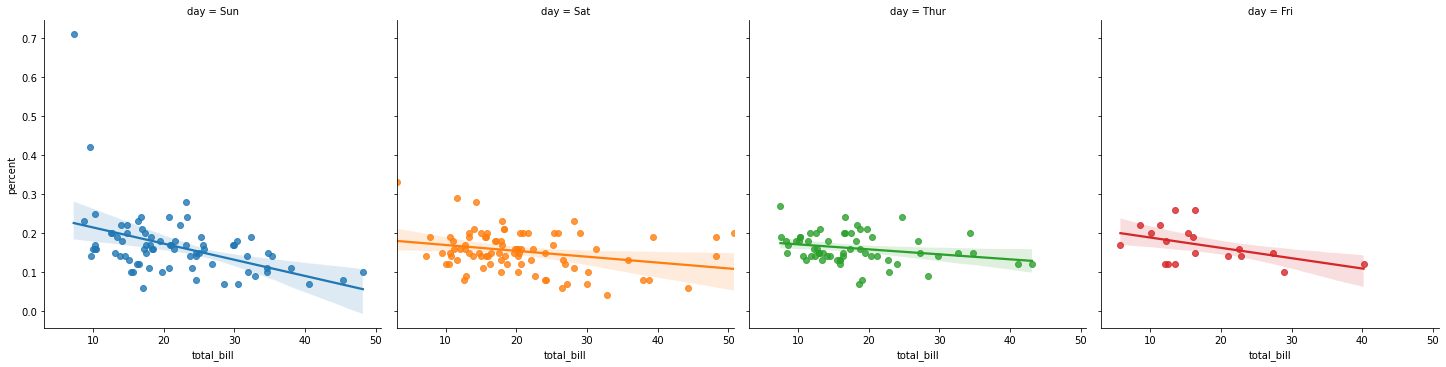

In [38]:
sns.lmplot(x='total_bill', y='percent', hue='day', col='day', data=dataframe)

In [39]:
dataframe.tip.mean()

2.99827868852459

In [41]:
dataframe.groupby('day').mean()

,total_bill,tip,size,percent
day,,,,
Fri,17.151579,2.734737,2.105263,0.169474
Sat,20.441379,2.993103,2.517241,0.153678
Sun,21.410000,3.255132,2.842105,0.166974
Thur,17.682742,2.771452,2.451613,0.161129


In [43]:
dataframe.day.value_counts().to_frame().rename(columns={ 'day': 'Frequency by weekday' })

,Frequency by weekday
Sat,87
Sun,76
Thur,62
Fri,19


### Hypothesis test

**H<sup>null</sup>**
> The total bill distribution is the same on saturday and sunday

**H<sup>alt</sup>**
> The total bill distribution is not the same on saturday and sunday

In [46]:
total_bill_sat = dataframe.query("day == 'Sat'").total_bill

In [47]:
total_bill_sun = dataframe.query("day == 'Sun'").total_bill

In [51]:
ranksums(total_bill_sat, total_bill_sun)

RanksumsResult(statistic=-0.9198084864360142, pvalue=0.3576728477868443)

**H<sup>null</sup>**
> The total bill distribution is the same on saturday and sunday

## Fouth analysis - Time

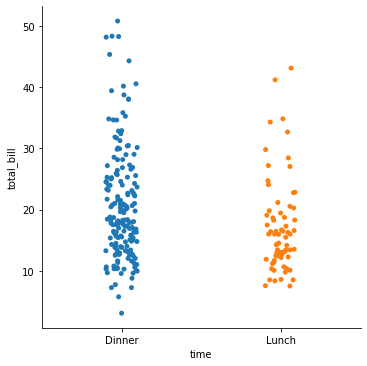

In [52]:
sns.catplot(x='time', y='total_bill', data=dataframe)

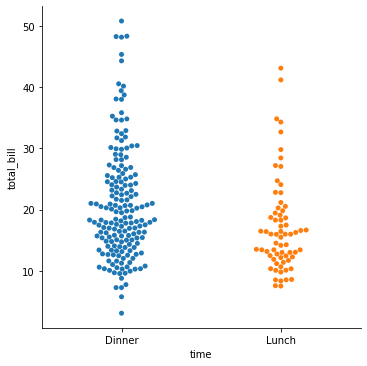

In [53]:
sns.catplot(x='time', y='total_bill', kind='swarm', data=dataframe)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

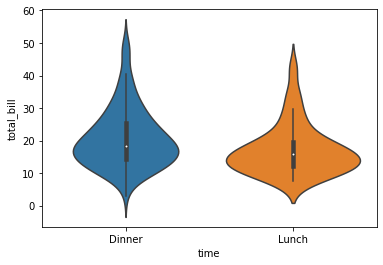

In [54]:
sns.violinplot(x='time', y='total_bill', data=dataframe)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

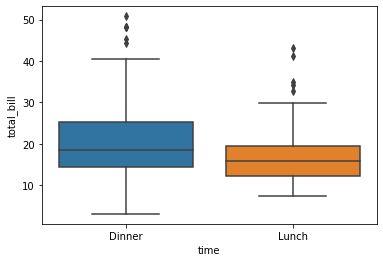

In [55]:
sns.boxplot(x='time', y='total_bill', data=dataframe)

In [56]:
lunch = dataframe.query("time == 'Lunch'").total_bill

In [57]:
dinner = dataframe.query("time == 'Dinner'").total_bill

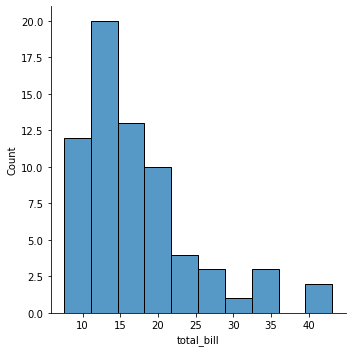

In [63]:
sns.displot(lunch)

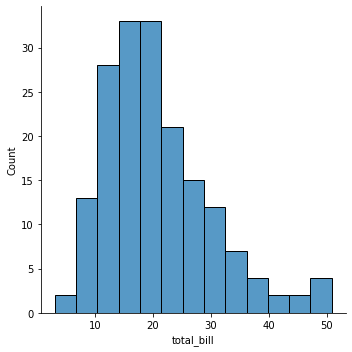

In [64]:
sns.displot(dinner)

In [65]:
dataframe.groupby('time').mean()

,total_bill,tip,size,percent
time,,,,
Dinner,20.797159,3.102670,2.630682,0.159773
Lunch,17.168676,2.728088,2.411765,0.163971


### Hypothesis test

**H<sup>null</sup>**
> The total bill distribution is the same on lanch and dinner

**H<sup>alt</sup>**
> The total bill distribution is not the same on lunch and dinner

In [66]:
ranksums(lunch, dinner)

RanksumsResult(statistic=-3.2438872807262955, pvalue=0.0011791039723641672)

**H<sup>alt</sup>**
> The total bill distribution is not the same on lunch and dinner

**H<sup>null</sup>**
> The tip distribution is the same on lanch and dinner

**H<sup>alt</sup>**
> The tip distribution is not the same on lunch and dinner

In [68]:
lunch = dataframe.query("time == 'Lunch'").percent

In [69]:
dinner = dataframe.query("time == 'Dinner'").percent

In [70]:
ranksums(lunch, dinner)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

**H<sup>null</sup>**
> The tip distribution is the same on lanch and dinner